# Water Potability prediction

In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import math

In [2]:
# read the dataset 

df = pd.read_csv('water_potability.csv')
print(df.shape)
df.head()

(3276, 10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Data Preprocessing
#### Data Cleansing  & Observation

In [3]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [4]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
df.fillna(df.mean(), inplace = True)

In [7]:
print(df.shape)
df.head()

(3276, 10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [8]:
#Converted into int and rounded up.
for cols in df.columns:
    df[cols] = df[cols].round(0).astype('int')

In [9]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7,205,20791,7,369,564,10,87,3,0
1,4,129,18630,7,334,593,15,56,5,0
2,8,224,19910,9,334,419,17,66,3,0
3,8,214,22018,8,357,363,18,100,5,0
4,9,181,17979,7,310,398,12,32,4,0


In [30]:
solids = df['Solids']
max_value = solids.max()
min_value = solids.min()
print(max_value, min_value)

56489 321


In [42]:
#Standardizing atrribute Solid
for rows in df['Solids']:
    rows = ((rows-min_value)/(max_value-min_value))
    df.colu


0.38628756587380714
0.3143782936903575
0.5061244836917818
0.5061422874234439
0.23769762142144993
0.44801310354650337
0.5720695057684091
0.3277666999002991
0.7253952428428999
0.4223045150263495
0.45059464463751603
0.545203674690215
0.30170203674690216
0.3720623842757442
0.5893747329440251
0.2648305084745763
0.39178891895741347
0.5739032901296112
0.3436120210796183
0.43496296823814273
0.4337523144851161
0.2908773678963111
0.5066763993733087
0.17185942173479563
0.1825594644637516
0.2748540094003703
0.37770616721264777
0.20817903432559465
0.34808075772681957
0.2065232872810141
0.38212149266486256
0.5066763993733087
0.4273429710867398
0.5665859564164649
0.3675402364335565
0.6151723401224897
0.43875516308218204
0.11433556473436832
0.5857961828799316
0.3407456202820111
0.4043049423159094
0.6701502634952285
0.4299067084460903
0.5622774533542231
0.1645954992166358
0.4797571571001282
0.41849451645064806
0.47781655034895315
0.37653112092294544
0.21953781512605042
0.5036141575274178
0.492166358068

0.4458410482837203
0.4637516023358496
0.7343861273322888
0.40834638940321893
0.5619213787209799
0.13546859421734794
0.35794402506765416
0.13913616293975217
0.4208980202250392
0.4812526705597493
0.3845428001709158
0.3309535678678251
0.4706416464891041
0.1602691924227318
0.1657883492380003
0.5625979205241418
0.2560888762284575
0.39267910554052127
0.6845000712149266
0.4034503631961259
0.35516664292835776
0.1784289987181313
0.4263281583819969
0.4241561031192138
0.1869747899159664
0.2324455205811138
0.22160304799886058
0.16956274035037744
0.3449116934909557
0.39527845036319614
0.3970766272610739
0.21341333143426863
0.21880786212790201
0.3526563167639937
0.2208018800740635
0.3120994160376015
0.29876442102264633
0.2991204956558895
0.34395029198119925
0.20249964392536676
0.35069790628115655
0.2977674120495656
0.3326271186440678
0.5287708303660448
0.3366685657313773
0.738498789346247
0.43503418316479137
0.28345321179319183
0.48474220196553197
0.327980344680245
0.2380358923230309
0.1207983193277

In [10]:
#unique value
for cols in df.columns:
    unique_values = df[cols].unique()
    print("Feature ", cols, " has ", len(unique_values), " unique values")

Feature  ph  has  15  unique values
Feature  Hardness  has  201  unique values
Feature  Solids  has  3108  unique values
Feature  Chloramines  has  14  unique values
Feature  Sulfate  has  239  unique values
Feature  Conductivity  has  392  unique values
Feature  Organic_carbon  has  25  unique values
Feature  Trihalomethanes  has  107  unique values
Feature  Turbidity  has  7  unique values
Feature  Potability  has  2  unique values


## Exploratory Data Analysis

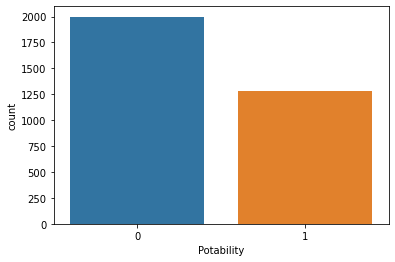

In [17]:
#Checking imbalance 
sns.countplot(df['Potability'])
plt.show()

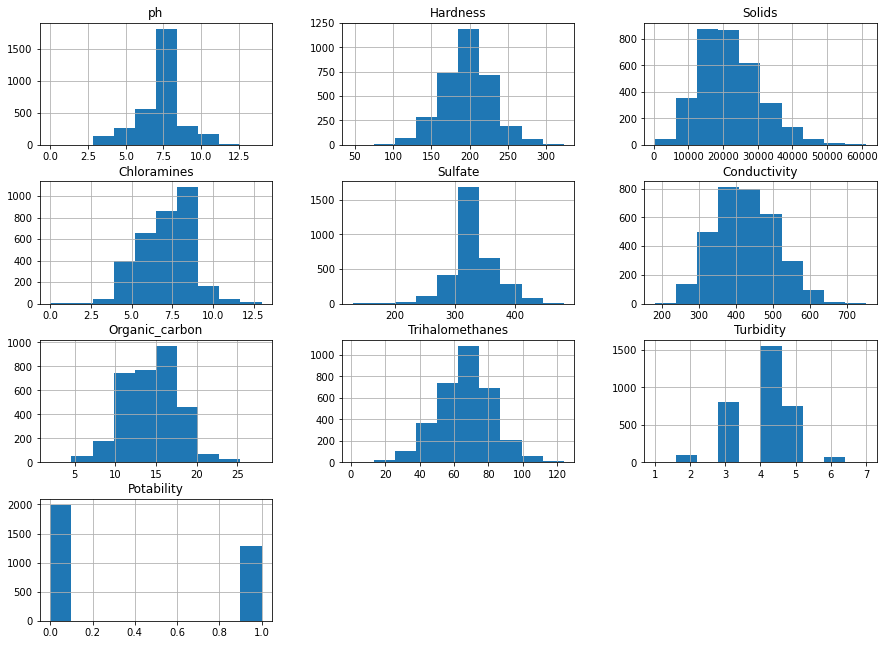

In [50]:
df.hist(figsize=(15,11))
plt.show()

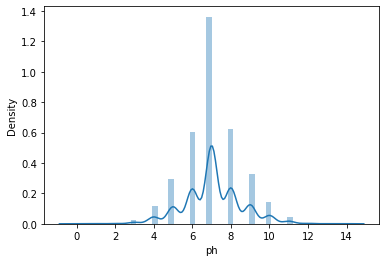

In [33]:
sns.distplot(df['ph'])
plt.show()

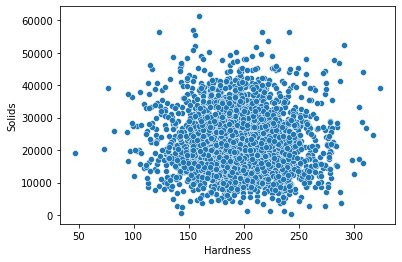

In [35]:
sns.scatterplot(df['Hardness'],df['Solids'])
plt.show()

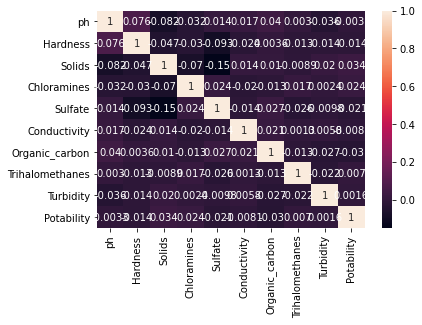

In [8]:
sns.heatmap(df.corr(),annot = True)
plt.show()
#no correlation between features so we cant reduce any of them

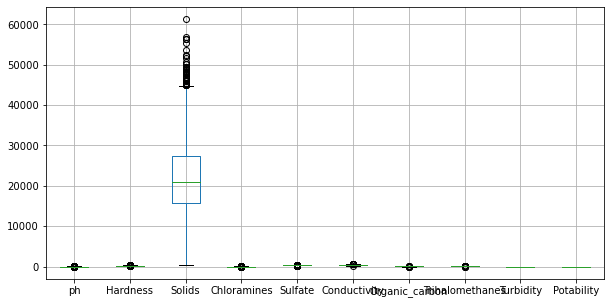

In [15]:
df.boxplot(figsize = (10,5))
plt.show()

## Data Splitting

In [43]:
X = df.drop(columns= 'Potability')  #x contain the input data
Y = df['Potability']                #y contain the target data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=20)


In [55]:
print(X_train.shape)
print(X_test.shape)

(2620, 9)
(656, 9)


## Model Creation & Evaluation

#### ZeroR Classifier

In [56]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
clf = DummyClassifier(strategy = "most_frequent")
clf.fit(X_train, Y_train)
Y_pred_train = clf.predict(X_train)
Y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(Y_pred_train, Y_train))
print("Test Accuracy: ", accuracy_score(Y_pred_test, Y_test))

Train Accuracy:  0.6125954198473282
Test Accuracy:  0.5990853658536586


#### Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix

In [62]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [63]:
Y_predict = clf.predict(X_test)

In [64]:
accuracy_score(Y_predict, Y_test)

0.5914634146341463

In [67]:
print("Accuracy on training set: {:.3f}".format(clf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.591


#### KNN with Euclidean Distance 

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.551829268292683 , Difference =  44.8170731707317 %
K =  5 , Training Accuracy =  0.7129770992366412  Test Accuracy =  0.5594512195121951 , Difference =  15.35258797244461 %
K =  10 , Training Accuracy =  0.6526717557251909  Test Accuracy =  0.5914634146341463 , Difference =  6.120834109104456 %
K =  15 , Training Accuracy =  0.6511450381679389  Test Accuracy =  0.5884146341463414 , Difference =  6.273040402159746 %
K =  20 , Training Accuracy =  0.6297709923664122  Test Accuracy =  0.5914634146341463 , Difference =  3.8307577732265896 %
K =  25 , Training Accuracy =  0.6293893129770992  Test Accuracy =  0.5945121951219512 , Difference =  3.487711785514802 %
K =  30 , Training Accuracy =  0.6282442748091603  Test Accuracy =  0.5975609756097561 , Difference =  3.068329919940427 %
K =  35 , Training Accuracy =  0.6236641221374046  Test Accuracy =  0.5899390243902439 , Difference =  3.3725097747160704 %
K =  45 , Training Accuracy =  0.

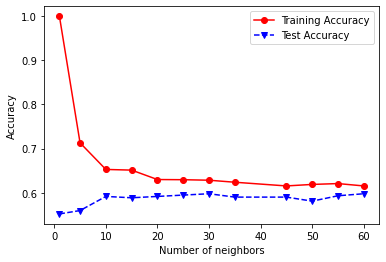

In [73]:
from sklearn.neighbors import KNeighborsClassifier
numNeighbors = [1, 5, 10, 15, 20, 25, 30, 35, 45, 50, 55, 60]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1